<a href="https://colab.research.google.com/github/Adrianft25/Curso-Big-Data-2023/blob/main/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lineal

Si prestas servicios de consultaría en una compañía de automóviles, lo primero que trataras de hacer será entender los factores que influyen en el precio de venta de los coches. Especificamente, ¿cuáles son los factores que conducen a aumentar los precios? Y cómo de preciso puedes predecir el precio de venta en función de las características del coche.


En esta práctica, relizaremos un análisis de regresión lineal simple a una base de datos que contiene precios de distintos coches, mostraremos como este análisis predictivo es hecho y cuales son las suposiciones que deben ser satisfechas por la regresión lineal. También mostraremos las diferentes vías de transformar nuestros datos.

## Objetivos


Después de completar esta práctica serás capaz de:

*   Seleccionar los factores significantes a través de un análisis visual
*   Comprobar las suposiciones realizadas en el modelo de regresión lineal utilizado
*   Aplicar el modelo de regresión lineal y realizar predicciones
*   Aplicar las "pipelines" (flujos de trabajo) para transformar los datos

***


## **Importando las librerias**


Para esta práctica haremos uso de las siguientes librerias:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) para el manego de los datos.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) para operaciones matemáticas.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) para visualizar los datos.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) para visualizar los datos.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) para funciones de "machine learning" y "machine-learning-pipeline"
*   [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/stats.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) para calculos estadísticos computacionales.


In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine
from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
import sklearn; print("Scikit-Learn", sklearn.__version__)

Scikit-Learn 1.2.2


In [3]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## **Leyendo y ententiendo nuestros datos**



Para esta práctica usaremos la base de datos de ventas de coches. La base de datos contiene toda la información sobre coches, el nombre del fabricante, el año que fue lanzado, todos los apartados técnicos y el precio de venta. Esta información se encuentra en el archivo CarPrice_Assignment.csv



Vamos a leer los datos con la ayuda de la libreria *pandas* y mostraremos en pantalla las 5 primeras lineas utilizando la función `head()`.


In [4]:
data = pd.read_csv('https://drive.google.com/uc?id=1MEaKUDoqvmjKTkqs54A2eEg0aNI93-oH&export=download')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Podemos encontrar más información sobre las características y opciones utilizando la función `info()`.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

De acuerdo con los "output" de arriba, tenemos 205 entradas (o filas), así como 26 columnas en el "data set". La columna "non-Null Count" muestra el número total de entradas con valor no nulo. Si la cantidad es 205 quiere decir que no falta ningún valor en toda la columna. El precio es nuestro objetivo principal, la cual llamaremos variable respuesta o variable dependiente, y el resto de las carácteristicas son nuestros valores predictores o variables dependientes.

También disponemos de 16 columnas numéricas (8 enteros y 8 decimales) y columnas categóricas (10 en total).

La función `describe()` nos provee de información estadística de los distintos valores numéricos.


In [6]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## **Data Cleaning and Wrangling**


Sabemos que esta parte resulta algo tediosa, pero no exajeramos si decimos que es el 80% del trabajo de un científico de datos y el 100% de un ingeniero de datos. Así que intentemos acabar cuanto antes.

Primero es esencial comprobar si hay valores nulos y ver como podemos solucionarlo.

In [7]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64



También buscaremos duplicidades utilizando la función `duplicated()` en la columna 'car_ID'. Cada coche tiene asignado un número identificativo, si en dos filas coincide el mismo número tendremos una duplicidad.


In [8]:
sum(data.duplicated(subset = 'car_ID')) == 0

True



Lo siguiente será observar algunas de nuestras variables categóricas. Usando la función `unique()` mostramos todos los posibles valores de la columna 'CarName'.


In [9]:
data["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 


Podemos ver que 'CarName' incluye tanto el nombre de la compañia y el modelo del coche. Ahora trataremos de separar el nombre la compañia del modelo del coche ya que, para nuestro modelo, sólo nos enfocaremos en el nombre del compañia.


In [10]:
data['brand'] = data.CarName.str.split(' ').str.get(0).str.lower()


Vamos a ver las distintas marcas con `unique()`. 


In [11]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)


Hay algunos errores de escritura o recolección de los datos no estandarizada, así que debemos corregirlo.

In [12]:
data['brand'] = data['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
data['brand'] = data['brand'].replace(['porcshce'], 'porsche')

#REVISA LAS MARCAS MAZDA Y TOYOTA
data['brand'] = data['brand'].replace(['maxda'], 'mazda')
data['brand'] = data['brand'].replace(['toyouta'], 'toyota')

In [13]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Realiza un gráfico de barras para representar el número de coches por marca.


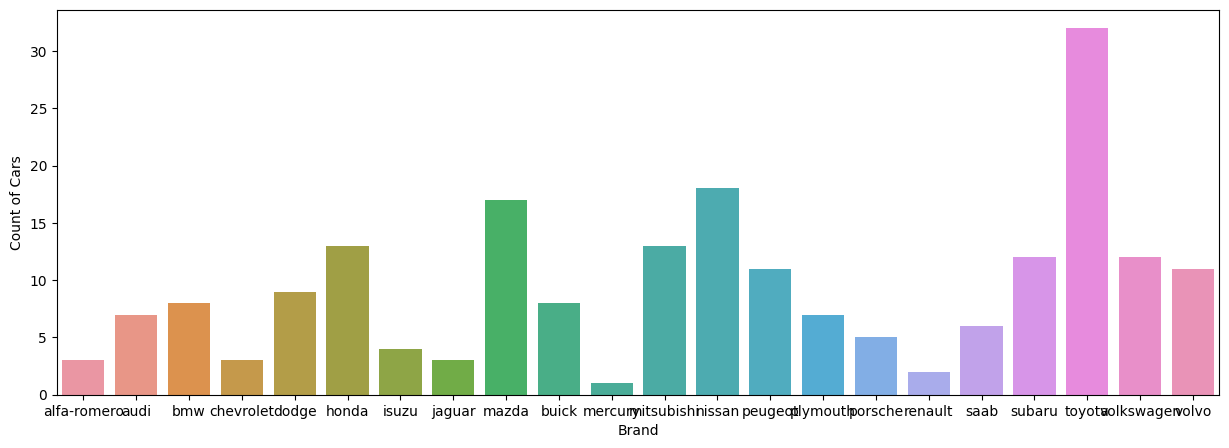

<Figure size 640x480 with 0 Axes>

In [14]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(data=data , x="brand")
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()


Podemos desecharnos de las columnas 'car_ID', 'symboling' and 'CarName' de nuestras bases de datos puesto que ya no son necesarias.


In [15]:
#INSERTA AQUI TU CÓDIGO
data = data.drop(['car_ID', 'CarName'], axis=1)


Seguidamente trataremos los datos para una mejor visualización y análisis. Agruparemos los datos en marca, calcularemos el precio medio de cada marca y, dividiremos el estos precios en 3 categorías distintas: 'Gama_entrada','Gama_media' y 'Gama_lujo', apodando esta nueva columna creada como 'categoría_marca'.


Para calcular la nueva columna con el precio medio de cada marca realiza un `groupby('brand', as_index = False).mean()` del dataframe `data` con las columnas `brand` y `price` solamente. Guarda el resultado del método anterior como `data_comp_avg_price` y aplica el método `.rename()` para cambiar la columna `price` a `brand_avg_price`

In [16]:
#INSERTA AQUÍ TU CÓDIGO
data_comp_avg_price = data.groupby('brand', as_index = False)['price'].mean()
data_comp_avg_price = data_comp_avg_price.rename(columns={'price': 'brand_avg_price'})

In [17]:
data = data.merge(data_comp_avg_price, on = 'brand')

Ahora hallaremos los valores medios de precio de venta por cada marca de coches.


In [18]:
data.brand_avg_price.describe()

count      205.000000
mean     13276.710571
std       7154.179185
min       6007.000000
25%       9239.769231
50%      10077.500000
75%      15489.090909
max      34600.000000
Name: brand_avg_price, dtype: float64

Aplicamos una función lambda para crear una nueva columna categórica que tome valores:


*   "Budget" si x < 10000
*    "Midrange" si 10000 <= x < 20000
* "Luxury" otro caso



In [19]:
data['brand_category'] = data['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_avg_price,brand_category
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,15498.333333,Mid_Range
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,15498.333333,Mid_Range
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,15498.333333,Mid_Range
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,3.40,10.0,102,5500,24,30,13950.0,audi,17859.166714,Mid_Range
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,3.40,8.0,115,5500,18,22,17450.0,audi,17859.166714,Mid_Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,3.15,9.5,114,5400,23,28,16845.0,volvo,18063.181818,Mid_Range
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,3.15,8.7,160,5300,19,25,19045.0,volvo,18063.181818,Mid_Range
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,2.87,8.8,134,5500,18,23,21485.0,volvo,18063.181818,Mid_Range
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,3.40,23.0,106,4800,26,27,22470.0,volvo,18063.181818,Mid_Range


En este punto los datos han sido "limpiados" por lo que recomendamos guardar el dataframe como `cleaned_car_data.csv` e `index=False`.

In [21]:
#INSERTA AQUI TU CÓDIGO
data.to_csv('cleaned_car_data.csv', index=False)


## **EDA**

### EDA para variables categóricas

Primero deseamos ver si existe añguna variable categórica que sea buena predictora de la variable precio.

Lista de variables categóricas:

*   categoría_marca
*   fueltype
*   enginetype
*   carbody
*   doornumber
*   enginelocation
*   fuelsystem
*   cylindernumber
*   aspiration
*   drivewheel

Usaremos la función `boxplot()` en las variables categóricas mencionadas arriba, para mostrar la media, varianza y los posibles valores atípicos con respecto al precio. En este proceso podremos intentar visualizar cierta tendecia entre categorías y precio.

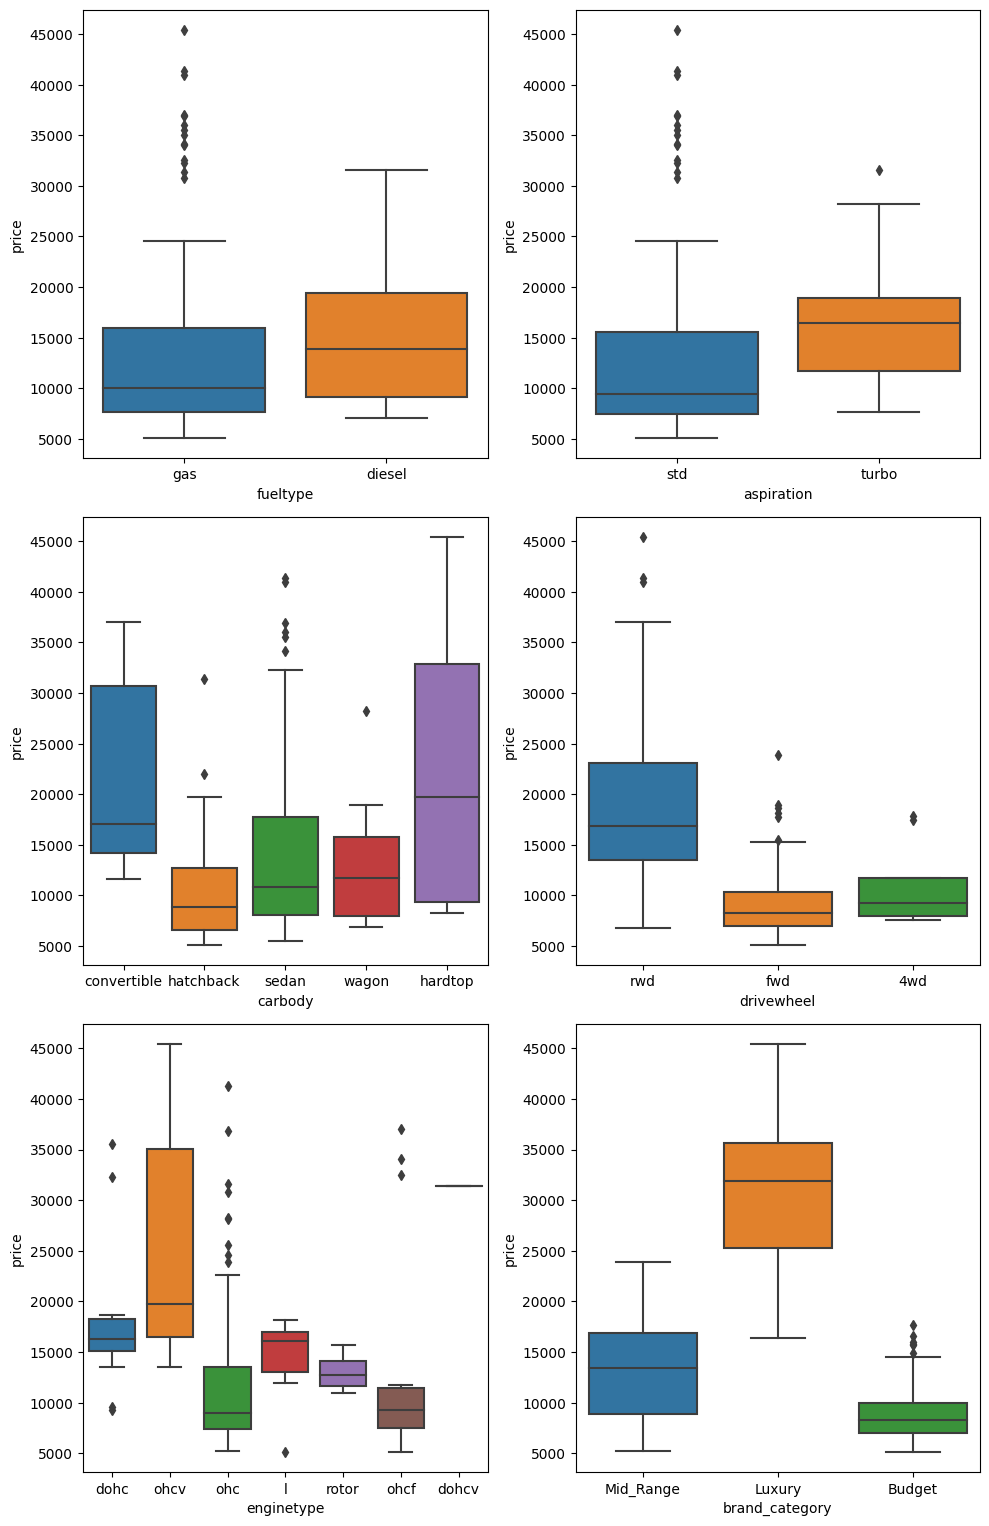

In [20]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = data)
plt.tight_layout()
plt.show()

#### Ejercicio

**Comenta si crees que alguna de las variables categoricas puede ser predictora de la variable precio:**

*INSERTA AQUI TU RESPUESTA*

### EDA para variables continuas

Lo siguiente será ver la lista de características continuas que muestran una mayor correlación. La función `corr()` calcula el coeficiente de Pearson con respecto al precio.


In [21]:
corr_matrix = data.corr()
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
brand_avg_price     0.895520
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

Estas son variables fuertemente correlacionadas con el precio final de venta del coche, por lo que aquellas que tienen mayor correlación serán aquellas que mejores resultados darán a la hora de predecir el valor.


También podemos usar la función `heatmap()` o `pairplot()` para mostrar un mapa de calor y una gráfica de dispersión respectivamente. De este modo podemos ver de una manera visual el grado de correlación entre las distintas variables.

#### Ejercicio 

Usa la función `pairplot(data)` para mostrar una gráfica de dispersión que muestre la relación entre las variables. Realiza también un gráfico `heatmap()` de la matriz de correlaciones.


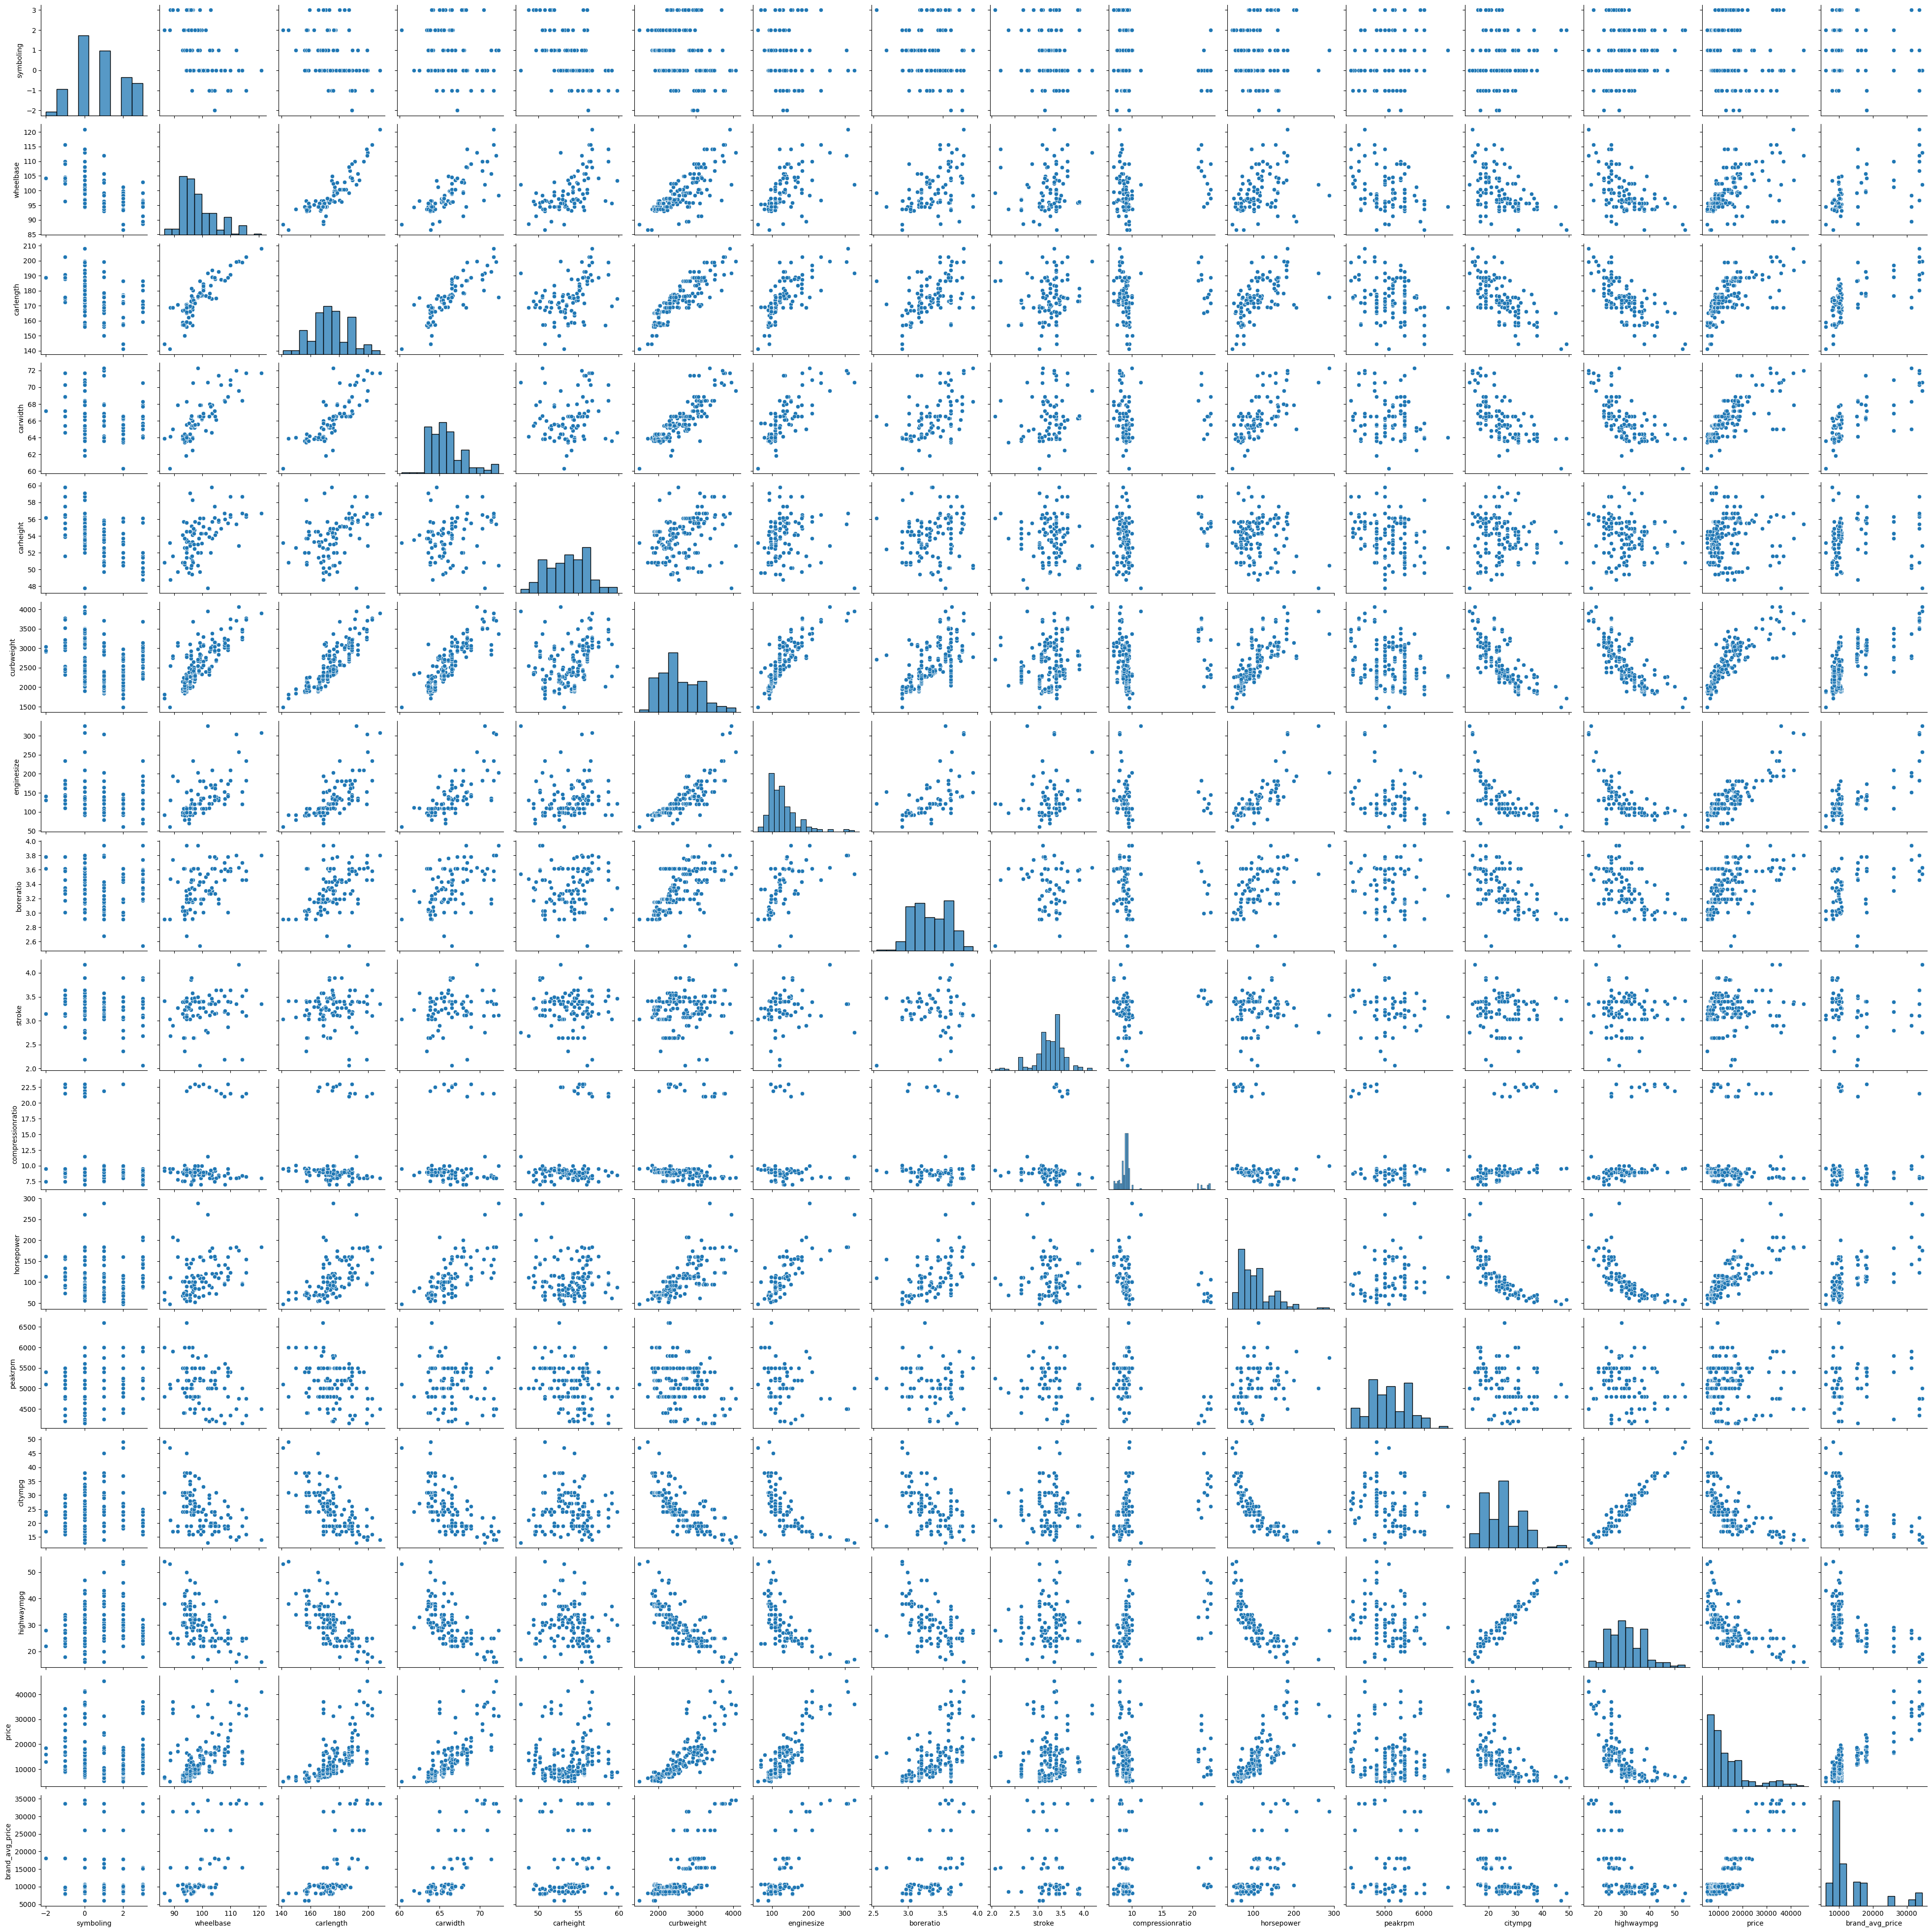

In [22]:
# INSERTA AQUI TU CÓDIGO Y TEN PACIENCIA
sns.pairplot(data)
plt.show()

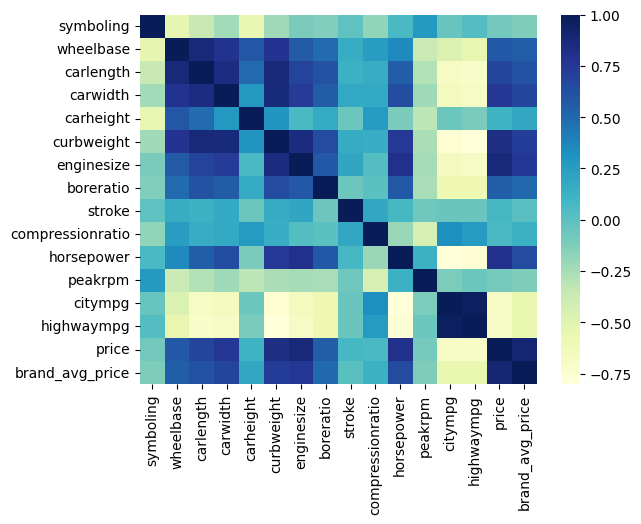

In [23]:
# INSERTA AQUI TU CÓDIGO Y TEN PACIENCIA
correlations = data.corr()
sns.heatmap(correlations, cmap="YlGnBu")
plt.show()

## **Modelo de regresión lineal**


Lista de valores significativos después del EDA:

Numéricos:

*   Curbweight
*   Car Length
*   Car width
*   Engine Size
*   Boreratio
*   Horse Power
*   Wheel base
*   City mpg (miles per gallon)
*   Highway mpg (miles per gallon)

Categóricos:

*   Engine Type
*   Fuel type
*   Car Body
*   Aspiration
*   Cylinder Number
*   Drivewheel
*   Brand Category

El resto de valores han sido descartados ya que presentan una muy baja correlación.

Vamos a poner todas las variables en un "data frame".


In [24]:
columns=['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand_category',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth','citympg','highwaympg']



selected = data[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   brand_category  205 non-null    object 
 7   curbweight      205 non-null    int64  
 8   enginetype      205 non-null    object 
 9   cylindernumber  205 non-null    object 
 10  enginesize      205 non-null    int64  
 11  boreratio       205 non-null    float64
 12  horsepower      205 non-null    int64  
 13  carlength       205 non-null    float64
 14  carwidth        205 non-null    float64
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
dtypes: float64(5), int64(5), object(7)


Podemos encontrar columnas categóricas iterando mediante la función `dtypes`.


In [25]:
categorical_columns=[key for key, value in selected.dtypes.iteritems()  if value=='O']
categorical_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'brand_category',
 'enginetype',
 'cylindernumber']

#### Ejercicio 

Encuentra los nombres de las columnas numéricas usando la lista `columns` y asignandolas a la lista `numeric_columns`.


In [ ]:
#INSERTA AQUÍ TU CÓDIGO


['highwaympg',
 'enginesize',
 'horsepower',
 'wheelbase',
 'price',
 'citympg',
 'carwidth',
 'carlength',
 'curbweight',
 'boreratio']

Podemos separar los datos entre factores `X` y objetivo `y`.


In [ ]:
X = selected.drop("price", axis=1)
X.head()


,fueltype,aspiration,carbody,drivewheel,wheelbase,brand_category,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
1,gas,std,convertible,rwd,88.6,Mid_Range,2548,dohc,four,130,3.47,111,168.8,64.1,21,27
2,gas,std,hatchback,rwd,94.5,Mid_Range,2823,ohcv,six,152,2.68,154,171.2,65.5,19,26
3,gas,std,sedan,fwd,99.8,Mid_Range,2337,ohc,four,109,3.19,102,176.6,66.2,24,30
4,gas,std,sedan,4wd,99.4,Mid_Range,2824,ohc,five,136,3.19,115,176.6,66.4,18,22


In [ ]:
y = selected["price"].copy()
y.head()

0    9.510075
1    9.711116
2    9.711116
3    9.543235
4    9.767095
Name: price, dtype: float64

### **Codificación one-hot**



Antes de explicar la codifición one-hot las variables categóricas vamos a examinar su distribución.


In [ ]:
for column in  categorical_columns:
    print("column name:", column)
    print("value_count:")
    print( X[column].value_counts())

column name: fueltype
value_count:
gas       185
diesel     20
Name: fueltype, dtype: int64
column name: aspiration
value_count:
std      168
turbo     37
Name: aspiration, dtype: int64
column name: carbody
value_count:
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
column name: drivewheel
value_count:
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
column name: brand_category
value_count:
Budget       95
Mid_Range    86
Luxury       24
Name: brand_category, dtype: int64
column name: enginetype
value_count:
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
column name: cylindernumber
value_count:
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


Vemos muchas variables categóricas que sólo tienen uno o unos pocas valores. Por ejemplo, en la columna `cylindernumber` vemos que `three` y `twelve` solamente aparecen una vez. 
Por tanto, si a la hora de separar el conjunto entre *train* y *test* casualmente todos los valores `three` y `twelve` no quedan dentro del conjunto *test* el modelo será entrenado desconociendo la posibilidad de que existan estos valores.

Por otro lado es posible que categorías que no tiene un orden asociado den la sensación de no tener una relación lineal por el orden en el que son representadas. Por ejemplo:

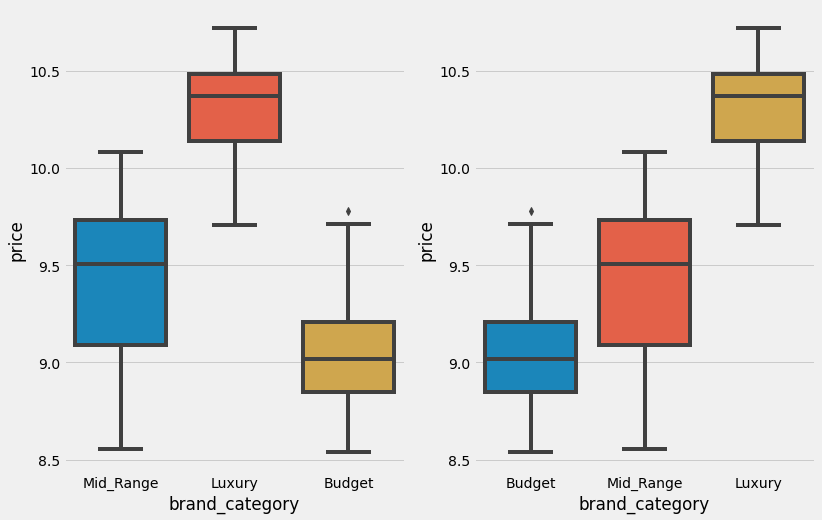

In [ ]:
fig, axes = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.boxplot(data=data ,x="brand_category", y="price",ax=axes[0])
order=data[["brand_category","price"]]
order["brand_category"]=pd.Categorical(order["brand_category"],
    categories=['Budget', 'Mid_Range',"Luxury"],
                                   ordered=True)
sns.boxplot(data=order ,x="brand_category", y="price",ax=axes[1])

¿Cúal de las dos dirías que sigue una correlación lineal? Teniendo en cuenta que son variables categóricas que no debería afectar dicho orden. 

Para solucionar estos problemas una solución es transformar nuestro dataset mediante *one hot encoding*. Esta transformación convierte cada posible valor de las variables categóricas en una nueva columna. En esta columna se le asigna un valor 1 si la fila pertenecía a dicha categoría y 0 si no. 

Visualmente:
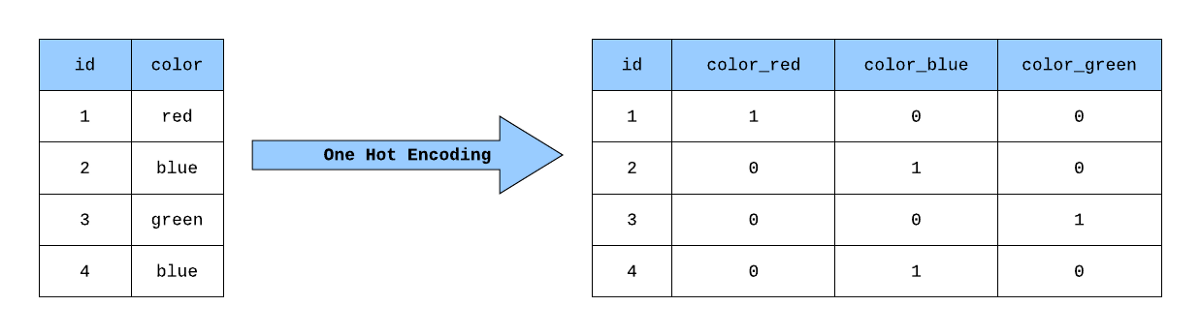

Para aplicar la codificación *one hot* usaremos los siguiente modulos:


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Para aplicar una codificación one-hot, usamos la función `ColumnTransformer`. 

El "input" se realiza de la siguiente manera:

Primero se le proporciona una lista `transformers` con las diferentes transformaciones, en este caso solo 1.

Dentro de la lista se especifica una tupla con formato: `(name, transformer, columns)`. Los parámetros de la tupla son las siguientes:

*   `name`: nombre de la transformación para referirse después.
*   `tranformer`: el tipo de transformación a realizar, en este caso usaremos `OneHotEncoder()`.
* `columns` las columnas a transformar, en este caso las categórias.

Adicionalmente a la lista `transformers` debemos dar un parámetro `reminder` a la función  `ColumnTransformer`.
`reminder` determina el comportamiento sobre el resto de columnas, de darle valor `drop` la función `ColumnTransformer` eliminará el resto de columnas a las que no se aplica la transformación. En el otro caso, (`remainder="passthrough"`) el resto de columnas no transformadas no son alteradas ni eliminadas. 

Aplicamos `fit_transform()` para transformar los datos.


In [ ]:
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), categorical_columns) ],remainder="passthrough")
X=one_hot.fit_transform(X)
X

array([[ 0. ,  1. ,  1. , ..., 64.1, 21. , 27. ],
       [ 0. ,  1. ,  1. , ..., 64.1, 21. , 27. ],
       [ 0. ,  1. ,  1. , ..., 65.5, 19. , 26. ],
       ...,
       [ 0. ,  1. ,  1. , ..., 68.9, 18. , 23. ],
       [ 1. ,  0. ,  0. , ..., 68.9, 26. , 27. ],
       [ 0. ,  1. ,  0. , ..., 68.9, 19. , 25. ]])

Vemos que el resultado es una matriz NumPy, así que vamos a obtener los nombres de las nuevas variables de la codificación `one-hot` usando  el método`get_feature_names_out()` para poder transformarla en un DataFrame. La salida será el nombre de la variable con el prefijo del nombre de la variable transformada. En la codificación one-hot, el prefijo también incluye el nombre de la columna de la que se ha generado la nueva variable.


In [ ]:
names=one_hot.get_feature_names_out()
names

array(['one_hot__fueltype_diesel', 'one_hot__fueltype_gas',
       'one_hot__aspiration_std', 'one_hot__aspiration_turbo',
       'one_hot__carbody_convertible', 'one_hot__carbody_hardtop',
       'one_hot__carbody_hatchback', 'one_hot__carbody_sedan',
       'one_hot__carbody_wagon', 'one_hot__drivewheel_4wd',
       'one_hot__drivewheel_fwd', 'one_hot__drivewheel_rwd',
       'one_hot__brand_category_Budget', 'one_hot__brand_category_Luxury',
       'one_hot__brand_category_Mid_Range', 'one_hot__enginetype_dohc',
       'one_hot__enginetype_dohcv', 'one_hot__enginetype_l',
       'one_hot__enginetype_ohc', 'one_hot__enginetype_ohcf',
       'one_hot__enginetype_ohcv', 'one_hot__enginetype_rotor',
       'one_hot__cylindernumber_eight', 'one_hot__cylindernumber_five',
       'one_hot__cylindernumber_four', 'one_hot__cylindernumber_six',
       'one_hot__cylindernumber_three', 'one_hot__cylindernumber_twelve',
       'one_hot__cylindernumber_two', 'remainder__wheelbase',
       'remain

Vamos a quitar el prefijo de las cadenas de texto nuevas.


In [ ]:
colunm_names=[name for name in [name[name.find("__")+2:] for name in names]]
colunm_names

['fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'carbody_convertible',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'brand_category_Budget',
 'brand_category_Luxury',
 'brand_category_Mid_Range',
 'enginetype_dohc',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'cylindernumber_eight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_three',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

Podemos guardar el "data frame" para ser usado en futuras prácticas.


In [ ]:
df=pd.DataFrame(data=X,columns=colunm_names)
df.to_csv('one_hot_data.csv', index=False)

### Train Test Split

Dividimos nuestros datos en datos entrenados y datos para testar, usando el 20% de los datos para la prueba. 


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=10)

### Estandarización de los datos


Estandarizamos características eliminando la media y escalando la variable entre 0 y 1 mediante `StandardScaler`.


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)

### Regresión lineal


Finalmente, aplicamos el modelo `LinearRegression()` y ajustamos (`fit()`) nuestros datos `X` e `y`.

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

### Haciendo predicciones

Seleccionamos el conjunto de datos test y aplicamos la función `predict()`.

In [ ]:
X_test=ss.fit_transform(X_test)
car_price_predictions = lm.predict(X_test)
car_price_predictions

array([ 9.02700288,  9.63318547,  9.13966964,  9.28008396, 10.51698041,
        9.14426183,  8.69832634,  9.20532406,  8.87104999,  9.70352045,
        9.3050059 ,  9.10052428,  8.87395607,  9.48700157, 10.8548461 ,
        9.59830269,  9.08033998,  9.46360683,  9.33949693,  9.49860101,
        8.85856217,  9.57257951,  9.28087871,  9.48908675,  9.61277926,
        9.71673267,  9.09007966,  8.76442705,  9.01045758,  9.59128524,
        8.82858394,  8.87174811,  8.80850576,  9.48176883, 10.30026471,
       10.13166898,  9.10295393,  9.59147318,  9.0437625 ,  8.70484929,
        9.13226246])

### Evaluación del modelo

Vamos a evaluar este modelo con algunas estadísticas. Para ello usaremos la función `mean_squared_error()` para está evaluación. El error cuadrático medio es, la media de la raiz cuadrada de la diferencia entre los valores estimados y el valor real. Para maás información del MSE, por favor, vísita este [enlace](https://en.wikipedia.org/wiki/Mean_squared_error?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01).



In [ ]:
mse = mean_squared_error(y_test, car_price_predictions)
mse

0.03349039930851818

Comprobando el valor de R cuadrado (también llamado coeficiente de determinación), el cual es la proporción de la variación de la variable dependiente predecida. Cuanto más cercano R cuadrado es de 1, mejor cumple nuestro modelo.


El método `score()` devuelve el coeficiente de determinación de la predicción.


In [ ]:
lm.score(X_test,y_test)

0.8433623116329106


El método `r2_score` devuelve el mismo valor estadístico.


In [ ]:
from sklearn.metrics import r2_score 

In [ ]:
r2_score(y_test,car_price_predictions)

0.8433623116329106

Si el valor de R cuadrado es negativo, sugiere que el sobreajuste, cunado un modelo cuadra perfectamente con los valores de la muestra.


## Pipeline Object


Como recordaremos de la introducción de Scikit-Learn, también podemos crear una Pipeline y aplicar un conjunto de secuencias de transformación. Entonces, aplicamos una regresión lineal. Las "Pipelines" simplifican los pasos del procesamiento de datos. Usamos el modulo "Pipeline" para crear una "Pipeline". También usamos `StandardScaler` como paso a nuestra "Pipeline".


#### Ejercicio

Crea una pipeline llamda `pipe` donde se utilice `StandardScaler()` como escalado y `LinearRegression()` como modelo. 

Utiliza la notebook de introducción a Scikit-Learn como recordatorio de ser necesario.

In [ ]:
#INSERTA AQUI TU CÓDIGO
 

Ajustamos (`fit`) la pipeline.


In [ ]:
#INSERTA AQUI TU CÓDIGO 


Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

Haz una predicción en base a X_test y realiza una evaluación del modelo, calcula el MSE y el RMSE. Calcula también el $R^2$


In [ ]:
#INSERTA AQUI TU CÓDIGO 
car_price_predictions = 
mse = 
rmse = 
r2= 
print(f"MSE: {mse} \nRMSE:{rmse} \nR2: {r2}")


MSE: 0.03349039930851819 
RMSE:0.18300382320738054 
R2: 0.8520180952348988


En este punto podríamos concluír que tenemos un modelo lineal genial. El MSE y el RMSE son realmente pequeños para unos datos de precio que estan en el caracter de las decenas de miles y un $R^2$ grande que indica que el modelo ajusta bien. Si no fuese porque esto no es así. Comparemos las predicciones y los valores reales:

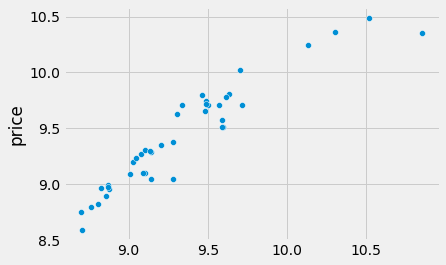

In [ ]:
sns.scatterplot(car_price_predictions, y_test)

Si nos fijamos los ejes no estan en el rango de las decenas de miles. De recordar un poco nuestros pasos anteriores, aplicamos una transformación logarítmica a la variable precio que nunca llegamos a revertir. Veamos que pasa si lo hacemos:

MSE: 15465865.077737235 
RMSE:3932.6664081431104 
R2: 0.7958694494957796


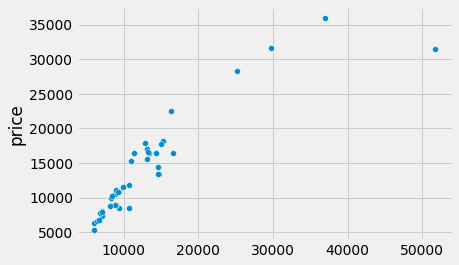

In [ ]:
car_price_predictions = pipe.predict(X_test)
car_price_predictions_exp = np.exp(car_price_predictions)
y_test_exp = np.exp(y_test)
mse = mean_squared_error(y_test_exp, car_price_predictions_exp)
rmse = np.sqrt(mse)
r2=r2_score(car_price_predictions_exp, y_test_exp)
print(f"MSE: {mse} \nRMSE:{rmse} \nR2: {r2}")

sns.scatterplot(car_price_predictions_exp, y_test_exp)

Como podemos ver ahora el modelo no es precisamente tan bueno como creíamos. De las predicciones que realizamos de media fallamos aproximadamente 4000 (rmse) dólares, una cantidad lo suficientemente grande como para merecer un despido. También era de esperar teniendo en cuenta que nuestros datos no cumple con la mayoría de las hipótesis de un modelo lineal. Así pues, veamos como mejorar este nuestro modelo en la siguente práctica.